# **Getting Started with NETS**

**NETS** is a vanilla Deep Learning framework, made using only **NumPy**.
This project was first introduced as an assignment I made at the [University of Oslo](https://www.uio.no/studier/emner/matnat/ifi/IN5400/) and [Stanford University](http://cs231n.stanford.edu/syllabus.html)
.
However, this project was recreated to make it *object-oriented like*.
**NETS** was highly inspired from [PyTorch](https://pytorch.org/) and [TensorFlow](https://www.tensorflow.org/)

Requirements :

- Numpy
- Json (Optional)
- Time (Optional)
- Pandas (Optional)
- Scipy (Optional)
- Scikit-Learn (Optional)

# 0. Set Up

Let's load the packages we need to run our tests:

In [1]:
import os
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

# Configure the style of a plot
matplotlib.style.use('seaborn-darkgrid')
# Change the font ?
font = {'size'   : 15}
matplotlib.rc('font', **font)

# 2. Build a model

In [2]:
import nets
import nets.nn as nn
from nets.function import tanh

model = nn.Sequential(nn.Linear(3, 10), 
                      nn.ReLU(),
                      nn.Linear(10, 2))

TypeError: tanh() missing 1 required positional argument: 'tensor'

In [14]:
X = (np.random.rand(100, 3) * 2 - 1) / 2

In [15]:
print(f"Sanity check:")
print(f"Expected mean: 0, real mean: {X.sum(axis=1).mean():1.4f}")

Sanity check:
Expected mean: 0, real mean: -0.1033


In [16]:
Y = model(X)

In [17]:
for value in model.modules():
    print(value)

In [47]:
for cache in model.cache():
    print(len(cache))

1
1
1


In [48]:
for grad in model.gradients():
    print(grad)

{}
{}
{}


In [49]:
layer = model._modules['linear0']
layer._grads

{}

In [76]:
from nets.tensor import Tensor
from nets.nn import Module
from nets.nn.loss import Loss, MSE
from nets.optim import Optimizer, SGD
from nets.data.batch import BatchIterator
from nets.utils import one_hot

def train(net, inputs, targets, optimizer, loss,
          num_epochs = 5000, iterator = BatchIterator()):
    epochs = []
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for batch in iterator(inputs, targets):
            predicted = net.forward(batch.inputs)
            epoch_loss += loss(predicted, batch.targets)
            grad = loss.backward(predicted, batch.targets)
            net.backward(grad)
            optimizer.step()
            epochs.append(epoch_loss)
        print(f"\r{epoch}, {epoch_loss:E}", end="")
    return epochs

In [81]:
import numpy as np

import nets.nn as nn
from nets.nn import Sequential
from nets.nn import Linear, ReLU, Tanh

inputs = np.array([[0, 0],
                   [1, 0],
                   [0, 1],
                   [1, 1]])

targets = np.array([[1, 0],
                    [0, 1],
                    [0, 1],
                    [1, 0]])

net = nn.Sequential(
                    Linear(2, 10),
                    Tanh(),
                    Linear(10, 2)
                )


loss = CrossEntropyLoss()
optimizer = SGD(net, lr=0.2)
epochs = train(net, inputs, targets, optimizer, loss)

# for x, y in zip(inputs, targets):
#     predicted = net.forward(x)

4999, 1.962518E-04

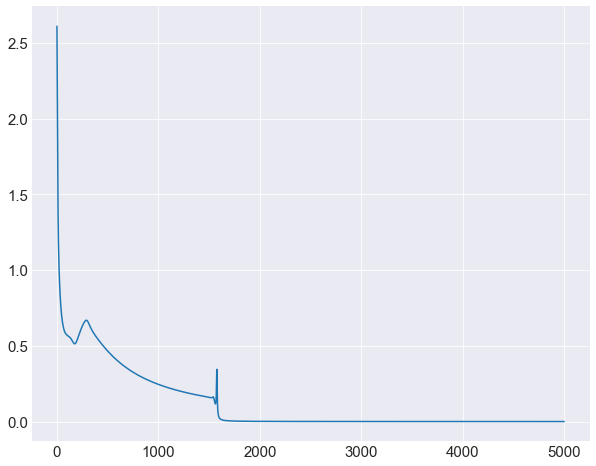

In [82]:
import matplotlib.pyplot as plt

plt.plot(epochs)

In [1]:
from nets.tensor import Tensor

x = Tensor([10, -10, 10, -5, 6, 3, 1], requires_grad=True)

# we want to minimize the sum of squares
for i in range(5000):
    x.zero_grad()

    sum_of_squares = (x * x).sum()  # is a 0-tensor
    sum_of_squares.backward()

    # ugly b/c we haven't implemented the stuff yet
    delta_x = 0.1 * x.grad
    x -= delta_x

    print(f"\r{i, sum_of_squares}", end="")

(4999, Tensor(0.0, requires_grad=True))rue)))))))))))))))))

In [2]:
x = Tensor([10, -10, 10, -5, 6, 3, 1], requires_grad=True)
y = Tensor([10, 0, 0, -5, 6, 3, 1], requires_grad=True)
z = Tensor([0, -0, 0, -5, 6, 3, 1], requires_grad=True)

In [3]:
z = x + y * 2 * x

In [4]:
z.backward(Tensor([10, -10, 10, -5, 6, 3, 1], requires_grad=True))


In [5]:
z.depends_on[1].tensor.depends_on[0].tensor.depends_on

[Hook(Tensor([10  0  0 -5  6  3  1], requires_grad=True), 
      grad_fn=<function _mul.<locals>.grad_fn1 at 0x000001B7D80AEDC8>)]

In [6]:
t1 = Tensor([1, 2, 3], requires_grad=True)
t2 = Tensor([4, 5, 6], requires_grad=True)

t3 = t1 + t2

assert t3.data.tolist() == [5, 7, 9]

t3.backward(Tensor([-1., -2., -3.]))

assert t1.grad.data.tolist() == [-1, -2, -3]
assert t2.grad.data.tolist() == [-1, -2, -3]

# t1 += 0.1
# assert t1.grad is None
# assert t1.data.tolist() == [1.1, 2.1, 3.1]

In [7]:
print(t3.grad)
print(t2.grad)
print(t1.grad)

Tensor([-1. -2. -3.], requires_grad=False)
Tensor([-1. -2. -3.], requires_grad=False)
Tensor([-1. -2. -3.], requires_grad=False)


In [8]:
t1 = Tensor([1, 2, 3], requires_grad=True)
t2 = Tensor([4, 5, 6], requires_grad=True)

t3 = t1 * t2

assert t3.data.tolist() == [4, 10, 18]

t3.backward(Tensor([-1., -2., -3.]))

assert t1.grad.data.tolist() == [-4, -10, -18]
assert t2.grad.data.tolist() == [-1,  -4,  -9]

# t1 *= 0.1
# assert t1.grad is None

# np.testing.assert_array_almost_equal(t1.data, [0.1, 0.2, 0.3])

In [9]:
print(t3.grad)
print(t2.grad)
print(t1.grad)

Tensor([-1. -2. -3.], requires_grad=False)
Tensor([-1. -4. -9.], requires_grad=False)
Tensor([ -4. -10. -18.], requires_grad=False)


In [10]:
t3.depends_on

[Hook(Tensor([1 2 3], requires_grad=True), 
      grad_fn=<function _mul.<locals>.grad_fn1 at 0x000001B7D94FC798>),
 Hook(Tensor([4 5 6], requires_grad=True), 
      grad_fn=<function _mul.<locals>.grad_fn2 at 0x000001B7D94FC0D8>)]